In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use("~/.matplotstyle/scientific.mplstyle")

In [2]:
dfBantu = pd.read_excel (r'BantuNC.xlsx')
dfBantu['Population'] = 'BantuNC'
dfCARF = pd.read_excel (r'CARF.xlsx')
dfCARF['Population'] = 'CARF'
dfCWNC = pd.read_excel (r'CWNC.xlsx')
dfCWNC['Population'] = 'CWNC'
dfEAAA = pd.read_excel (r'EAAA.xlsx')
dfEAAA['Population'] = 'EAAA'
dfEANS = pd.read_excel (r'EANS.xlsx')
dfEANS['Population'] = 'EANS'
dfFWNC = pd.read_excel (r'FWNC.xlsx')
dfFWNC['Population'] = 'FWNC'
dfKS = pd.read_excel (r'KS.xlsx')
dfKS['Population'] = 'KhoeSan'
dfFinal = pd.concat([dfBantu, dfCARF, dfCWNC, dfEAAA, dfEANS, dfFWNC, dfKS], ignore_index=True)

# Convert columns to correct data type, string to float
dfFinal["N50 (Kbp)"] = dfFinal["N50 (Kbp)"].str.strip("Kbp")
dfFinal["N50 (Kbp)"] = pd.to_numeric(dfFinal["N50 (Kbp)"], downcast="float")
dfFinal["Length (Mbp)"] = dfFinal["Length (Mbp)"].str.strip("Mbp")
dfFinal["Length (Mbp)"] = pd.to_numeric(dfFinal["Length (Mbp)"], downcast="float")
dfFinal["Genome Fraction"] = dfFinal["Genome Fraction"].str.strip("%")
dfFinal["Genome Fraction"] = pd.to_numeric(dfFinal["Genome Fraction"], downcast="float")

display(dfFinal)

,Sample Name,N50 (Kbp),N75 (Kbp),L50 (K),L75 (K),Largest contig (Kbp),Length (Mbp),Misassemblies,Mismatches/100kbp,Indels/100kbp,Genome Fraction,Population
0,LP6005441_DNA_F01.assemble_contigs,1.1,0.7Kbp,600.4K,1159.4K,11.9Kbp,1957.199951,1030.0,82.73,13.15,62.500000,BantuNC
1,LP6005443_DNA_A01.assemble_contigs,1.3,0.8Kbp,512.1K,1043.4K,20.6Kbp,2182.100098,1279.0,85.30,13.89,69.699997,BantuNC
2,LP6005443_DNA_E02.assemble_contigs,1.2,0.8Kbp,544.7K,1088.8K,23.9Kbp,2111.600098,1209.0,85.25,14.03,67.400002,BantuNC
3,LP6005443_DNA_G02.assemble_contigs,1.1,0.8Kbp,570.5K,1120.9K,16.6Kbp,2006.500000,973.0,85.70,13.81,64.099998,BantuNC
4,NA19028.assemble_contigs,8.0,4.1Kbp,97.7K,214.8K,113.8Kbp,2719.699951,1547.0,107.83,21.03,88.300003,BantuNC
...,...,...,...,...,...,...,...,...,...,...,...,...
163,KSP155.assemble_contigs,2.3,1.3Kbp,310.8K,686.3K,41.8Kbp,2530.800049,2475.0,107.36,17.29,81.099998,KhoeSan
164,KSP224.assemble_contigs,2.4,1.3Kbp,300.7K,661.2K,63.9Kbp,2554.300049,1794.0,108.13,17.27,81.900002,KhoeSan
165,KSP228.assemble_contigs,2.3,1.2Kbp,316.0K,696.1K,46.1Kbp,2534.600098,1965.0,106.59,17.39,81.199997,KhoeSan
166,LP6005443_DNA_G08.assemble_contigs,1.2,0.8Kbp,535.2K,1076.7K,30.3Kbp,2150.800049,1404.0,96.50,15.53,68.699997,KhoeSan


In [3]:
# Get the values we're interested in
populations = dfFinal["Population"]
N50 = dfFinal["N50 (Kbp)"]
length = dfFinal["Length (Mbp)"]
genomefrac = dfFinal["Genome Fraction"]

<Figure size 1080x720 with 0 Axes>

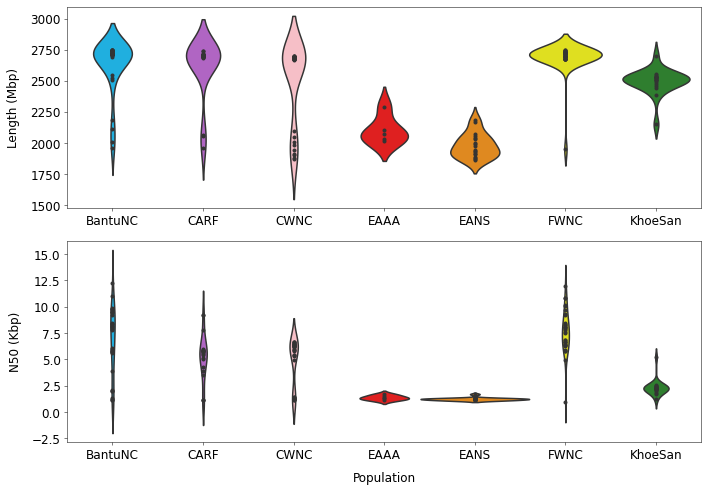

In [4]:
plt.figure(figsize=(15, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
colors_list = ['deepskyblue', 'mediumorchid', 'lightpink', 'red','darkorange', 'yellow', 'forestgreen']
sns.violinplot(ax = ax1, x = populations, y = length, palette=colors_list, inner = 'point')
ax1.set(xlabel=None)
sns.violinplot(ax = ax2, x = populations, y = N50, palette=colors_list, inner = 'point', width = 1.2)
#plt.savefig('multiQC.svg', format='svg', dpi=1200)
plt.show()

In [5]:
# Now going to make plots of before and after removing kak genomes from EAAA and EANS
dfEAAAbefore = pd.read_excel (r'EAAAbefore.xlsx')
dfEANSbefore = pd.read_excel (r'EANSbefore.xlsx')

dfBefore = pd.concat([dfEAAAbefore, dfEANSbefore], ignore_index=True)
dfAfter = pd.concat([dfEAAA, dfEANS], ignore_index=True)

# Convert columns to correct data type, string to float
dfBefore["N50 (Kbp)"] = dfBefore["N50 (Kbp)"].str.strip("Kbp")
dfBefore["N50 (Kbp)"] = pd.to_numeric(dfBefore["N50 (Kbp)"], downcast="float")
dfBefore["Length (Mbp)"] = dfBefore["Length (Mbp)"].str.strip("Mbp")
dfBefore["Length (Mbp)"] = pd.to_numeric(dfBefore["Length (Mbp)"], downcast="float")

dfAfter["N50 (Kbp)"] = dfAfter["N50 (Kbp)"].str.strip("Kbp")
dfAfter["N50 (Kbp)"] = pd.to_numeric(dfAfter["N50 (Kbp)"], downcast="float")
dfAfter["Length (Mbp)"] = dfAfter["Length (Mbp)"].str.strip("Mbp")
dfAfter["Length (Mbp)"] = pd.to_numeric(dfAfter["Length (Mbp)"], downcast="float")

In [6]:
# Get the values we're interested in
populationsbefore = dfBefore["Population"]
populationsafter = dfAfter["Population"]
N50before = dfBefore["N50 (Kbp)"]
N50after = dfAfter["N50 (Kbp)"]
lengthbefore = dfBefore["Length (Mbp)"]
lengthafter = dfAfter["Length (Mbp)"]

<Figure size 1080x720 with 0 Axes>

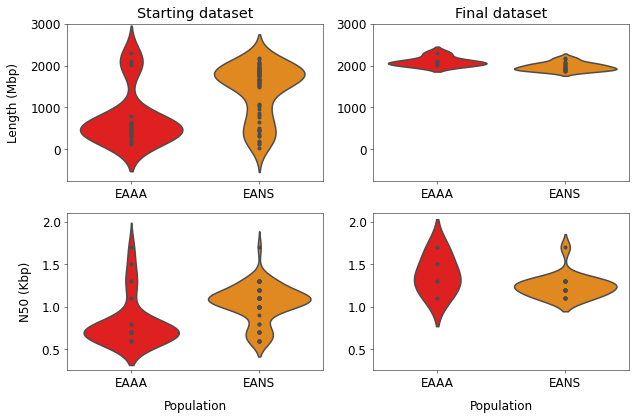

In [7]:
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
colors_list = ['red','darkorange']
sns.violinplot(ax = axes[0, 0], x = populationsbefore, y = lengthbefore, palette=colors_list, inner = 'point')
axes[0, 0].set_ylim(bottom=-750, top=3000)
sns.violinplot(ax = axes[0, 1], x = populationsafter, y = lengthafter, palette=colors_list, inner = 'point', )
axes[0, 1].set_ylim(bottom=-750, top=3000)
axes[0, 0].set(xlabel=None)
axes[0, 1].set(xlabel=None)
axes[0, 1].set(ylabel=None)
sns.violinplot(ax = axes[1, 0], x = populationsbefore, y = N50before, palette=colors_list, inner = 'point')
axes[1, 0].set_ylim(bottom=0.25, top=2.1)
sns.violinplot(ax = axes[1, 1], x = populationsafter, y = N50after, palette=colors_list, inner = 'point')
axes[1, 1].set_ylim(bottom=0.25, top=2.1)
axes[1, 1].set(ylabel=None)
axes[0, 0].set_title("Starting dataset")
axes[0, 1].set_title("Final dataset")
#plt.savefig('beforeafterQC.svg', format='svg', dpi=1200)
plt.show()

In [10]:
display (dfAfter)

,Sample Name,N50 (Kbp),N75 (Kbp),L50 (K),L75 (K),Largest contig (Kbp),Length (Mbp),Misassemblies,Mismatches/100kbp,Indels/100kbp,Genome Fraction,Population
0,LP6005442_DNA_D09.assemble_contigs,1.1,0.8Kbp,597.4K,1169.3K,12.6Kbp,2101.899902,1063.0,77.87,12.51,67.1%,EAAA
1,egpg5305762.assemble_contigs,1.7,1.0Kbp,359.1K,753.9K,30.8Kbp,2016.699951,1504.0,91.17,13.97,64.8%,EAAA
2,egpg5305920.assemble_contigs,1.3,0.9Kbp,473.3K,962.7K,24.5Kbp,2070.699951,1454.0,86.94,12.59,66.7%,EAAA
3,egpg5305949.assemble_contigs,1.3,0.8Kbp,482.7K,975.3K,45.4Kbp,2036.199951,1581.0,86.48,12.03,65.5%,EAAA
4,egpg5305974.assemble_contigs,1.5,0.9Kbp,446.3K,927.8K,30.1Kbp,2292.399902,1672.0,87.41,13.45,73.6%,EAAA
5,10_UO_113T_150731_L003.assemble_contigs,1.1,0.8Kbp,546.5K,1056.7K,13.2Kbp,1884.199951,1499.0,95.00,13.57,60.8%,EANS
6,13_UO_134T_150731_L005.assemble_contigs,1.3,0.9Kbp,478.2K,965.2K,21.8Kbp,2074.899902,1535.0,98.67,14.19,66.7%,EANS
7,16_UO_142T_150731_L006.assemble_contigs,1.2,0.8Kbp,538.8K,1048.9K,13.5Kbp,1935.300049,1530.0,95.58,13.67,62.4%,EANS
8,17_UO_144T_150731_L007.assemble_contigs,1.3,0.8Kbp,491.4K,979.2K,15.4Kbp,1974.699951,1467.0,98.24,14.18,63.6%,EANS
9,1_UO_005T_150730_L001.assemble_contigs,1.2,0.8Kbp,497.1K,984.2K,12.8Kbp,1925.300049,1691.0,97.60,14.00,62.0%,EANS


In [ ]:
# Get values:
dfcopy1 = dfBefore.loc[dfBefore['Population'] == "EAAA"]
dfcopy2 = dfAfter.loc[dfAfter['Population'] == "EAAA"]
print (dfcopy1)
print (dfcopy2)
print (dfcopy2["N50 (Kbp)"].mean() - dfcopy1["N50 (Kbp)"].mean())
# Get values:
dfcopy1 = dfBefore.loc[dfBefore['Population'] == "EANS"]
dfcopy2 = dfAfter.loc[dfAfter['Population'] == "EANS"]
print (dfcopy1)
print (dfcopy2)
print (dfcopy2["N50 (Kbp)"].mean() - dfcopy1["N50 (Kbp)"].mean())

In [18]:
# Now going to make Appendix plots of all of the groups...

dfBantubefore = pd.read_excel (r'Bantubefore.xlsx')
dfCARFbefore = pd.read_excel (r'CARFbefore.xlsx')
dfCWNCbefore = pd.read_excel (r'CWNCbefore.xlsx')
dfEAAAbefore = pd.read_excel (r'EAAAbefore.xlsx')
dfEANSbefore = pd.read_excel (r'EANSbefore.xlsx')
dfFWNCbefore = pd.read_excel (r'FWNCbefore.xlsx')
dfKSbefore = pd.read_excel (r'KhoeSanbefore.xlsx')

dfBefore = pd.concat([dfBantubefore, dfCARFbefore, dfCWNCbefore, dfEAAAbefore, dfEANSbefore, dfFWNCbefore, dfKSbefore], ignore_index=True)
dfAfter = pd.concat([dfBantu, dfCARF, dfCWNC, dfEAAA, dfEANS, dfFWNC, dfKS], ignore_index=True)

# Convert columns to correct data type, string to float
dfBefore["N50 (Kbp)"] = dfBefore["N50 (Kbp)"].str.strip("Kbp")
dfBefore["N50 (Kbp)"] = pd.to_numeric(dfBefore["N50 (Kbp)"], downcast="float")
dfBefore["Length (Mbp)"] = dfBefore["Length (Mbp)"].str.strip("Mbp")
dfBefore["Length (Mbp)"] = pd.to_numeric(dfBefore["Length (Mbp)"], downcast="float")

dfAfter["N50 (Kbp)"] = dfAfter["N50 (Kbp)"].str.strip("Kbp")
dfAfter["N50 (Kbp)"] = pd.to_numeric(dfAfter["N50 (Kbp)"], downcast="float")
dfAfter["Length (Mbp)"] = dfAfter["Length (Mbp)"].str.strip("Mbp")
dfAfter["Length (Mbp)"] = pd.to_numeric(dfAfter["Length (Mbp)"], downcast="float")

In [19]:
# Get the values we're interested in
populationsbefore = dfBefore["Population"]
populationsafter = dfAfter["Population"]
N50before = dfBefore["N50 (Kbp)"]
N50after = dfAfter["N50 (Kbp)"]
lengthbefore = dfBefore["Length (Mbp)"]
lengthafter = dfAfter["Length (Mbp)"]

<Figure size 640x480 with 0 Axes>

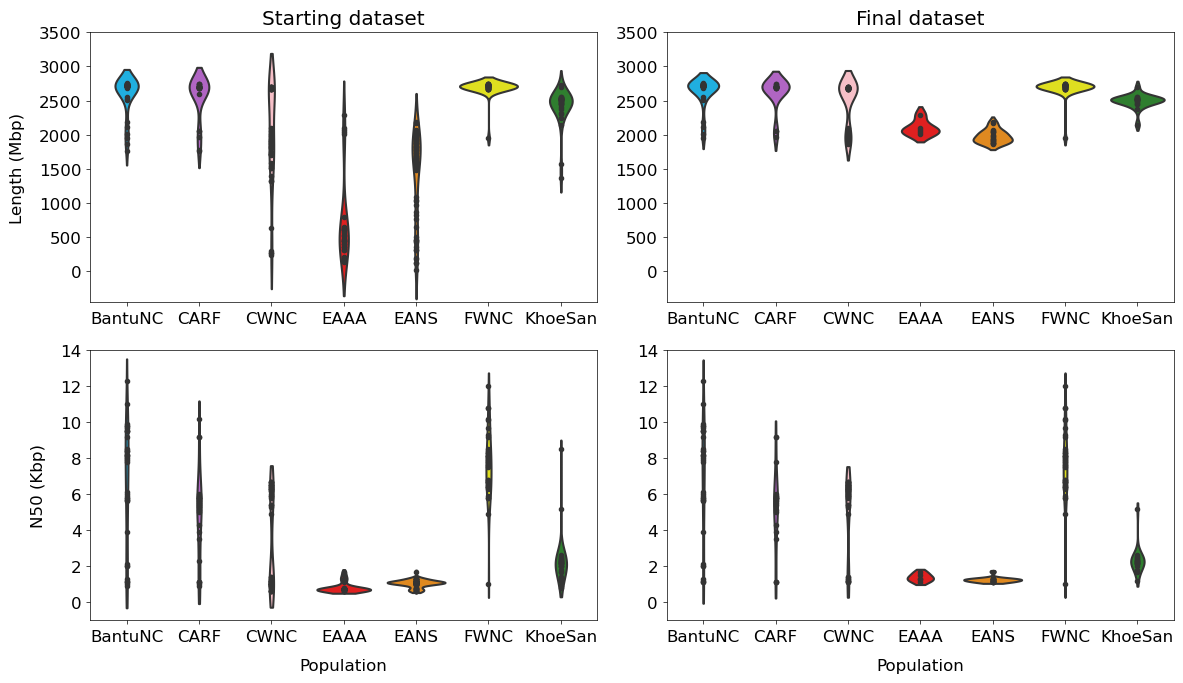

In [47]:
plt.figure()
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
colors_list = ['deepskyblue', 'mediumorchid', 'lightpink', 'red','darkorange', 'yellow', 'forestgreen']
sns.violinplot(ax = axes[0, 0], x = populationsbefore, y = lengthbefore, palette=colors_list, inner = 'point', cut = 1.5)
axes[0, 0].set_ylim(bottom=-450, top=3500)
sns.violinplot(ax = axes[0, 1], x = populationsafter, y = lengthafter, palette=colors_list, inner = 'point', cut = 1.5)
axes[0, 1].set_ylim(bottom=-450, top=3500)
axes[0, 0].set(xlabel=None)
axes[0, 1].set(xlabel=None)
axes[0, 1].set(ylabel=None)
sns.violinplot(ax = axes[1, 0], x = populationsbefore, y = N50before, palette=colors_list, inner = 'point', cut = 0.75)
axes[1, 0].set_ylim(bottom=-1, top=14)
sns.violinplot(ax = axes[1, 1], x = populationsafter, y = N50after, palette=colors_list, inner = 'point', cut = 0.75)
axes[1, 1].set_ylim(bottom=-1, top=14)
axes[1, 1].set(ylabel=None)
axes[0, 0].set_title("Starting dataset")
axes[0, 1].set_title("Final dataset")
#plt.savefig('beforeafterQCall.svg', format='svg', dpi=1200)
plt.show()